In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from ButcherTableau import *

In [2]:
RK3 = ButcherTableau('RK3', [[0,0,0,0], [1,0,0,0], [0.25,0.25,0,0], [1/6,1/6,2/3,0]], [1/6,1/6,2/3,0])

s = 2
SDIRK23_SO = SDIRK3(s)
SDIRK23 = SDIRK23_SO.Butcher()
SDIRK23_0 = SDIRK23.addZeroRow()

RK3_3i = ButcherTableau('RK3_3i', [[0,0,0,0], [0.5,0.5,0,0], [0.25,0,0.25,0], [1/6,1/6,2/3,0]], [1/6,1/6,2/3,0])
RK3_2i = ButcherTableau('RK3_2i', [[0,0,0,0], [0.5,0.5,0,0], [0.25,0,0.25,0], [0.5,0,0,0.5]], [0.5,0,0,0.5])
RK3_1i = ButcherTableau('RK3_1i', [[0,0,0,0], [0,1,0,0], [0,0,0.5,0], [0,0,0,1]], [0,0,0,1])
RK3_1e = ButcherTableau('RK3_1e', [[0,0,0,0], [1,0,0,0], [0,0.5,0,0], [0,0,1,0]], [0,0,1,0])

A =  [[0.21132487 0.        ]
 [0.57735027 0.21132487]]  b =  [0.5 0.5]


In [3]:
def trap(z, zlim = 1):
    a = max(0, 1-2*zlim/z)
    #t = ButcherTableau('trap', [[0,0,0,0], [1-a,a,0,0], [0.5*(1-a),0,0.5*a,0], [1-a,0,0,a]], [1-a,0,0,a])
    A = (1-a)*RK3_2i.A + a*RK3_1i.A
    return ButcherTableau('trap', A, A[-1])

def RK3Trap(z, zlim = 1):
    a = max(0, 1-zlim/z)
    RKi = trap(z, zlim)
    Ai = RKi.A
    Ae = RK3.A
    A = (1-a)*Ae + a*Ai
    return ButcherTableau('RK3Trap', A, A[-1])

def RK3i(z, zlim = 1):
    a = max(0, 1-zlim/z)
    Ae = RK3.A
    Ai = RK3_1i.A
    A = (1-a)*Ae + a*Ai
    return ButcherTableau('RK3i', A, A[-1])

In [4]:
scheme = RK3Trap(1.8, zlim = 1)
scheme.describe()

RK scheme RK3Trap
A = [[0.         0.         0.         0.        ]
 [0.77777778 0.22222222 0.         0.        ]
 [0.25       0.13888889 0.11111111 0.        ]
 [0.31481481 0.09259259 0.37037037 0.22222222]]
w = [0.31481481 0.09259259 0.37037037 0.22222222]
c = [0.  1.  0.5 1. ]
First order condition 0.9999999999999999 shoud be 1
Second order condition 0.5 should be 0.5
Third order condition wac is 1.2222222222222219/6 should be 1/6
Third order condition wcc is 1.2222222222222219/3 should be 1/3
order 2.5555555555555562
det(A) = 0.0
L-stable False


In [5]:
def RK3e(z, zlim = 1, damp = 0):
    a = max(0, 1-zlim/z)
    Ae = RK3.A
    Ai = RK3_1e.A
    A = (1-a)*Ae + a*Ai*(1-a)**damp
    #A = (1-a)*Ae
    return ButcherTableau('RK3e', A, A[-1])

RK3_exp = ButcherTableau('RK3_exp', [[0,0,0],[1,0,0],[0.25,0.25,0]],[1/6,1/6,2/3])
beta = 2/3
gamma = (2*beta**2 - 3/2*beta + 1/3)/(2 - 4*beta)
RK3_imp = ButcherTableau('RK3_exp', [[0,0,0],[0,1,0],[1/6,-1/3,2/3]],[1/6,1/6,2/3])
IMEX3 = doubleButcher(RK3_exp, RK3_imp)
IMEX = doubleButcher(RK3, RK3_3i)
IMEX2 = doubleButcher(RK3, RK3_2i)
IMEX2 = doubleButcher(RK3, RK3_1i)

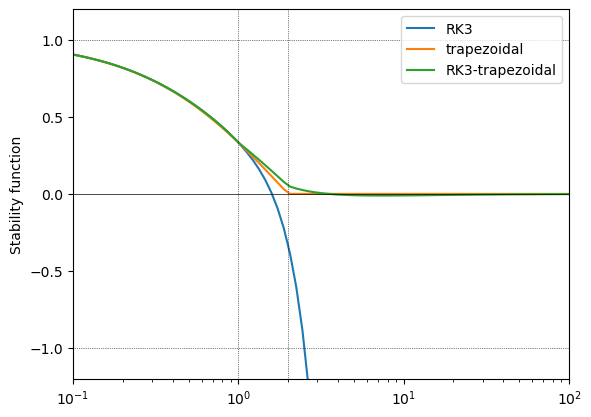

In [6]:
# Plot stability functions for exponential decay
z = 10**(np.linspace(-1,2,81))
sTrap = np.zeros_like(z)
sRK3Trap = np.zeros_like(z)
for i in range(len(z)):
    sRK3Trap[i] = RK3Trap(z[i],zlim=1).stabilityFunction([z[i]])[0]
    sTrap[i] = trap(z[i],zlim=1).stabilityFunction([z[i]])[0]
plt.semilogx(z, RK3.stabilityFunction(z), label='RK3')
plt.semilogx(z, sTrap, label='trapezoidal')
plt.semilogx(z, sRK3Trap, label='RK3-trapezoidal')
plt.legend()
plt.ylim([-1.2,1.2])
plt.xlim([z[0],z[-1]])
plt.axhline(1, ls=':', c='k', lw=0.5)
plt.axhline(0, ls='-', c='k', lw=0.5)
plt.axhline(-1, ls=':', c='k', lw=0.5)
plt.axvline(1, ls=':', c='k', lw=0.5)
plt.axvline(2, ls=':', c='k', lw=0.5)
plt.ylabel("Stability function")
plt.savefig("plots/ImEx_stability_decay.pdf")

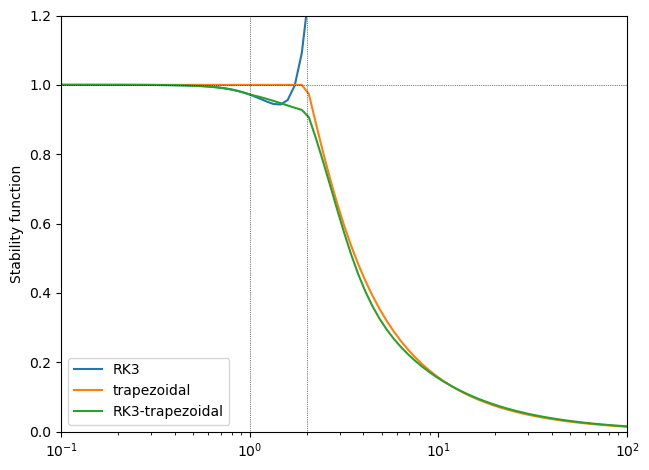

In [7]:
# Plot stability functions for a pure oscillation
z = 10**(np.linspace(-1,2,81))
sTrap = np.zeros_like(z)
sRK3Trap = np.zeros_like(z)
for i in range(len(z)):
    sTrap[i] = trap(z[i],zlim=1).stabilityFunctionImag([z[i]])[0]
    sRK3Trap[i] = RK3Trap(z[i],zlim=1).stabilityFunctionImag([z[i]])[0]
plt.semilogx(z, RK3.stabilityFunctionImag(z), label='RK3')
plt.semilogx(z, sTrap, label='trapezoidal')
plt.semilogx(z, sRK3Trap, label='RK3-trapezoidal')
plt.legend()
plt.ylim([0,1.2])
plt.xlim([z[0],z[-1]])
plt.axhline(1, ls=':', c='k', lw=0.5)
plt.axvline(1, ls=':', c='k', lw=0.5)
plt.axvline(2, ls=':', c='k', lw=0.5)
plt.tight_layout()
plt.ylabel("Stability function")
plt.savefig("plots/ImEx_stability_osc.pdf")

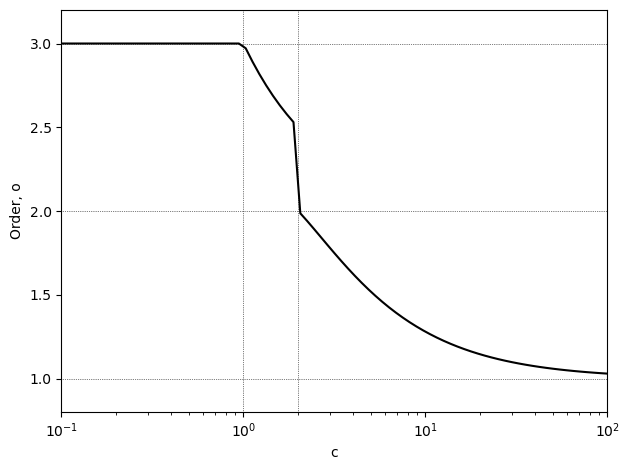

In [8]:
# Plot the order of accuracy
z = 10**(np.linspace(-1,2,81))
RK3io = np.zeros_like(z)
for i in range(len(z)):
    RK3io[i] = RK3Trap(z[i],zlim=1).order(orderConditions=[])
plt.semilogx(z, RK3io, 'k', label='implicit')
#plt.legend()
plt.ylim([0.8,3.2])
plt.xlim([z[0],z[-1]])
plt.axhline(1, ls=':', c='k', lw=0.5)
plt.axhline(2, ls=':', c='k', lw=0.5)
plt.axhline(3, ls=':', c='k', lw=0.5)
plt.axvline(1, ls=':', c='k', lw=0.5)
plt.axvline(2, ls=':', c='k', lw=0.5)
plt.xlabel('c')
plt.ylabel('Order, o')
plt.tight_layout()
plt.savefig("plots/ImEx_order.pdf")